# 서울시 코로나19 확진자 현황 API

In [19]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [20]:
with open('../static/data/seoul_api_key.txt', mode='r') as key_fd:
    seoulapi_key = key_fd.read(100)

In [21]:
corona_url = 'http://openapi.seoul.go.kr:8088'
type = 'xml'
start_index = 1
end_index = 1000
url = f'{corona_url}/{seoulapi_key}/{type}/Corona19Status/{start_index}/{end_index}'

In [22]:
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')
resultCode = soup.find('RESULT').find('CODE').get_text()
if resultCode == 'INFO-000':
    list_total_count = int(soup.find('list_total_count').get_text())
    print(list_total_count)
else:
    print(soup.find('RESULT').find('MESSAGE').get_text())

18253


In [23]:
list_total_count = int(soup.find('list_total_count').get_text())
list_total_count

18253

In [24]:
items = soup.find_all('row')

In [25]:
id_list, date_list, no_list, country_list = [],[],[],[]
personal_list, area_list, travel_list, contact_list = [],[],[],[]
corrective_list, status_list, moving_list, idate_list = [],[],[],[]
mdate_list = []
for item in items:
    id_list.append(item.find('CORONA19_ID').string)
    date_list.append(item.find('CORONA19_DATE').string)
    no_list.append(item.find('CORONA19_NO').string)
    country_list.append(item.find('CORONA19_COUNTRY').string)
    personal_list.append(item.find('CORONA19_PERSONAL').string)
    area_list.append(item.find('CORONA19_AREA').string)
    travel_list.append(item.find('CORONA19_TRAVEL_HISTORY').string)
    contact_list.append(item.find('CORONA19_CONTACT_HISTORY').string)
    corrective_list.append(item.find('CORONA19_CORRECTIVE').string)
    status_list.append(item.find('CORONA19_LEAVE_STATUS').string)
    moving_list.append(item.find('CORONA19_MOVING_PATH').string)
    idate_list.append(item.find('CORONA19_IDATE').string)
    mdate_list.append(item.find('CORONA19_MDATE').string)

df = pd.DataFrame({
    '연번':id_list, '확진일':date_list, '환자번호':no_list, '국적':country_list,
    '환자정보':personal_list, '지역':area_list, '여행력':travel_list,
    '접촉력':contact_list, '조치사항':corrective_list, '상태':status_list, 
    '이동경로':moving_list, '등록일':idate_list, '수정일':mdate_list
})
df.tail()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
995,17258,12.26.,None,None,None,중구,None,감염경로 조사중,None,None,None,2020-12-29 10:42:48,2020-12-29 10:42:48
996,17257,12.26.,None,None,None,송파구,None,기타 확진자 접촉,None,None,None,2020-12-29 10:42:48,2020-12-29 10:42:48
997,17256,12.26.,None,None,None,중랑구,None,감염경로 조사중,None,None,None,2020-12-29 10:42:48,2020-12-29 10:42:48
998,17255,12.26.,None,None,None,송파구,None,기타 확진자 접촉,None,None,None,2020-12-29 10:42:48,2020-12-29 10:42:48
999,17254,12.26.,None,None,None,기타,None,송파구 소재 장애인 생활시설 관련,None,None,None,2020-12-29 10:42:48,2020-12-29 10:42:48


### 모든 데이터에 대해 처리

In [26]:
from tqdm import tqdm_notebook

In [27]:
id_list, date_list, no_list, country_list = [],[],[],[]
personal_list, area_list, travel_list, contact_list = [],[],[],[]
corrective_list, status_list, moving_list, idate_list = [],[],[],[]
mdate_list = []
for i in tqdm_notebook(range(1, list_total_count, 1000)):
    start_index = i
    end_index = i+1000-1 if i+1000-1<list_total_count else list_total_count
    url = f'{corona_url}/{seoulapi_key}/{type}/Corona19Status/{start_index}/{end_index}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'xml')
    items = soup.find_all('row')

    for item in items:
        id_list.append(item.find('CORONA19_ID').string)
        date_list.append(item.find('CORONA19_DATE').string)
        no_list.append(item.find('CORONA19_NO').string)
        country_list.append(item.find('CORONA19_COUNTRY').string)
        personal_list.append(item.find('CORONA19_PERSONAL').string)
        area_list.append(item.find('CORONA19_AREA').string)
        travel_list.append(item.find('CORONA19_TRAVEL_HISTORY').string)
        contact_list.append(item.find('CORONA19_CONTACT_HISTORY').string)
        corrective_list.append(item.find('CORONA19_CORRECTIVE').string)
        status_list.append(item.find('CORONA19_LEAVE_STATUS').string)
        moving_list.append(item.find('CORONA19_MOVING_PATH').string)
        idate_list.append(item.find('CORONA19_IDATE').string)
        mdate_list.append(item.find('CORONA19_MDATE').string)


In [28]:
df = pd.DataFrame({
    '연번':id_list, '확진일':date_list, '환자번호':no_list, '국적':country_list,
    '환자정보':personal_list, '지역':area_list, '여행력':travel_list,
    '접촉력':contact_list, '조치사항':corrective_list, '상태':status_list, 
    '이동경로':moving_list, '등록일':idate_list, '수정일':mdate_list
})
df.tail()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
18248,5,1.31.,None,None,None,성북구,None,#5 접촉,None,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-28 11:36:30
18249,4,1.30.,None,None,None,마포구,중국 우한시,해외 접촉,None,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-28 11:36:30
18250,3,1.30.,None,None,None,종로구,None,#3 접촉,None,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-28 11:36:30
18251,2,1.30.,None,None,None,중랑구,중국 우한시,해외 접촉,None,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-28 11:36:30
18252,1,1.24.,None,None,None,강서구,중국 우한시,해외 접촉,None,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-28 11:36:30


In [29]:
df.to_csv('../static/tmp/covid-seoul.csv')

In [30]:
df = pd.read_csv('../static/tmp/covid-seoul.csv')

In [31]:
df['연번'] = df['연번'].astype(int)
df.head()

,Unnamed: 0,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
0,0,18253,12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
1,1,18252,12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
2,2,18251,12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
3,3,18250,12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
4,4,18249,12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50


In [32]:
df.sort_values('연번', inplace=True)
df.set_index('연번', inplace=True)
df.tail()

,Unnamed: 0,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
연번,,,,,,,,,,,,,
18249,4,12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
18250,3,12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
18251,2,12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
18252,1,12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
18253,0,12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50


In [33]:
df['확진일'] = '2020.' + df['확진일']
df.tail()

,Unnamed: 0,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
연번,,,,,,,,,,,,,
18249,4,2020.12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
18250,3,2020.12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
18251,2,2020.12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
18252,1,2020.12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
18253,0,2020.12.28.,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50


In [34]:
df['확진일'] = pd.to_datetime(df['확진일'])
df.tail()

,Unnamed: 0,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
연번,,,,,,,,,,,,,
18249,4,2020-12-28,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
18250,3,2020-12-28,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
18251,2,2020-12-28,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
18252,1,2020-12-28,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50
18253,0,2020-12-28,NaN,NaN,NaN,송파구,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-29 10:42:50,2020-12-29 10:42:50


In [35]:
df['환자번호'].isna().sum(),df['국적'].isna().sum(),df['환자정보'].isna().sum(),df['조치사항'].isna().sum()

(18253, 18253, 18253, 18253)

In [36]:
df['등록일'].unique()

array(['2020-12-23 13:35:20', '2020-12-23 13:35:21',
       '2020-12-23 13:35:22', '2020-12-23 13:35:23',
       '2020-12-23 13:35:24', '2020-12-23 13:35:25',
       '2020-12-23 13:35:26', '2020-12-23 13:35:27',
       '2020-12-23 13:35:28', '2020-12-23 13:35:29',
       '2020-12-23 13:35:30', '2020-12-23 13:35:31',
       '2020-12-23 13:35:32', '2020-12-23 13:35:33',
       '2020-12-23 13:35:34', '2020-12-23 13:35:35',
       '2020-12-23 13:35:36', '2020-12-23 13:35:37',
       '2020-12-23 13:35:38', '2020-12-23 13:35:39',
       '2020-12-29 10:42:35', '2020-12-29 10:42:36',
       '2020-12-29 10:42:37', '2020-12-29 10:42:38',
       '2020-12-29 10:42:39', '2020-12-29 10:42:40',
       '2020-12-29 10:42:41', '2020-12-29 10:42:42',
       '2020-12-29 10:42:43', '2020-12-29 10:42:44',
       '2020-12-29 10:42:45', '2020-12-29 10:42:46',
       '2020-12-29 10:42:47', '2020-12-29 10:42:48',
       '2020-12-29 10:42:49', '2020-12-29 10:42:50'], dtype=object)

In [37]:
df['수정일'].unique()

array(['2020-12-28 11:36:30', '2020-12-29 10:42:35',
       '2020-12-29 10:57:07', '2020-12-29 10:42:36',
       '2020-12-29 10:42:37', '2020-12-29 10:42:38',
       '2020-12-29 10:42:39', '2020-12-29 10:42:40',
       '2020-12-29 10:42:41', '2020-12-29 10:42:42',
       '2020-12-29 10:42:43', '2020-12-29 10:42:44',
       '2020-12-29 10:42:45', '2020-12-29 10:42:46',
       '2020-12-29 10:42:47', '2020-12-29 10:42:48',
       '2020-12-29 10:42:49', '2020-12-29 10:42:50'], dtype=object)

In [38]:
df['이동경로'].unique()

array(['이동경로 공개기간 경과', nan, '집에만 머물러 의미있는 동선 없음', '자가격리중으로 동선없음',
       '관내 의미있는 동선없음',
       '- 이동 시 아래 대중교통 이외에는 지인차 및 도보 이용 - 역학조사 기간중 우리구 동선은 자택 이외에는 없음 - 12.16.(수) 선별진료소에서 코로나19 진단검사 - 가족 진단검사 및 자가격리 실시',
       '- 이동 시 아래 대중교통 이외에는 도보 이용 - 아래 동선 이외에는 자택에 머무름',
       '- 이동 시 아래 대중교통 이외에는 지인차 및 도보 이용 - 아래 동선 이외에는 자택에 머무름',
       '- 이동 시 도보 이용 - 아래 동선 이외에는 자택에 머무름',
       '- 이동 시 가족차 및 도보 이용 - 역학조사 기간중 자택 이외에는 우리구내 이동동선이 없음 - 12.16.(수) 성북구보건소 선별진료소에서 코로나19 진단검사 - 가족 및 지인 진단검사 및 자가격리 실시',
       '- 이동 시 자차 및 도보 이용 - 아래 동선 이외에는 자택에 머무름',
       '- 이동 시 지인차,자전거 및 도보 이용 - 아래 동선 이외에는 자택에 머무름',
       '- 이동 시 지인차 및 도보 이용 - 아래 동선 이외에는 자택에 머무름',
       '- 이동 시 아래 대중교통 이외에는 자전거 및 도보 이용 - 아래 동선 이외에는 자택에 머무름',
       '- 이동 시 지인차 및 도보 이용 - 역학조사 기간중 자택 이외에는 우리구 이동동선이 없음 - 12.16.(수) 씨젠의료재단 선별진료소에서 코로나19 진단검사 - 가족 및 지인 진단검사 및 자가격리 실시',
       '- 이동 시 회사차 및 도보 이용 - 아래 동선 이외에는 자택에 머무름',
       'o 주로 자택에 머물러 의미 있는 동선 없음', '15일부터 집에만 머뭄',
       '주로 자택에 머물러 의미 있는 동선 없음', '자가격리 중으로 동선없음', '병원에서 숙식

In [39]:
df.head()

,Unnamed: 0,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일
연번,,,,,,,,,,,,,
1,18252,2020-01-24,NaN,NaN,NaN,강서구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-28 11:36:30
2,18251,2020-01-30,NaN,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-28 11:36:30
3,18250,2020-01-30,NaN,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-28 11:36:30
4,18249,2020-01-30,NaN,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-28 11:36:30
5,18248,2020-01-31,NaN,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-28 11:36:30


In [40]:
df = df[['확진일', '지역', '여행력', '접촉력', '상태', '이동경로']]
df.head()

,확진일,지역,여행력,접촉력,상태,이동경로
연번,,,,,,
1,2020-01-24,강서구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과
2,2020-01-30,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과
3,2020-01-30,종로구,NaN,#3 접촉,퇴원,이동경로 공개기간 경과
4,2020-01-30,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과
5,2020-01-31,성북구,NaN,#5 접촉,퇴원,이동경로 공개기간 경과


In [41]:
df.to_csv('../static/tmp/covid-seoul2.csv')

### 데이터 클렌징

In [42]:
df = pd.read_csv('../static/tmp/covid-seoul2.csv')
df.tail()

,연번,확진일,지역,여행력,접촉력,상태,이동경로
18248,18249,2020-12-28,송파구,NaN,동부구치소 관련,NaN,NaN
18249,18250,2020-12-28,송파구,NaN,동부구치소 관련,NaN,NaN
18250,18251,2020-12-28,송파구,NaN,동부구치소 관련,NaN,NaN
18251,18252,2020-12-28,송파구,NaN,동부구치소 관련,NaN,NaN
18252,18253,2020-12-28,송파구,NaN,동부구치소 관련,NaN,NaN


In [43]:
df['지역'].fillna('기타', inplace=True)
df.fillna(' ', inplace=True)
df.tail()

,연번,확진일,지역,여행력,접촉력,상태,이동경로
18248,18249,2020-12-28,송파구,,동부구치소 관련,,
18249,18250,2020-12-28,송파구,,동부구치소 관련,,
18250,18251,2020-12-28,송파구,,동부구치소 관련,,
18251,18252,2020-12-28,송파구,,동부구치소 관련,,
18252,18253,2020-12-28,송파구,,동부구치소 관련,,


In [44]:
df['지역'].unique()

array(['강서구', '중랑구', '종로구', '마포구', '성북구', '타시도', '송파구', '서대문구', '성동구',
       '강남구', '서초구', '구로구', '강동구', '은평구', '관악구', '금천구', '노원구', '동작구',
       '양천구', '동대문구', '광진구', '영등포구', '도봉구', '용산구', '강북구', '중구', '기타',
       '중로구', '구로구 '], dtype=object)

In [45]:
df[df['지역'] == '서대']

,연번,확진일,지역,여행력,접촉력,상태,이동경로


In [46]:
df['지역'][13520] = '서대문구'

In [47]:
df['지역'].unique()

array(['강서구', '중랑구', '종로구', '마포구', '성북구', '타시도', '송파구', '서대문구', '성동구',
       '강남구', '서초구', '구로구', '강동구', '은평구', '관악구', '금천구', '노원구', '동작구',
       '양천구', '동대문구', '광진구', '영등포구', '도봉구', '용산구', '강북구', '중구', '기타',
       '중로구', '구로구 '], dtype=object)

In [48]:
df['지역'] = df['지역'].map(lambda s: s.strip())

In [49]:
df['지역'].unique()

array(['강서구', '중랑구', '종로구', '마포구', '성북구', '타시도', '송파구', '서대문구', '성동구',
       '강남구', '서초구', '구로구', '강동구', '은평구', '관악구', '금천구', '노원구', '동작구',
       '양천구', '동대문구', '광진구', '영등포구', '도봉구', '용산구', '강북구', '중구', '기타',
       '중로구'], dtype=object)

In [50]:
df[df['지역'] == '중로구']

,연번,확진일,지역,여행력,접촉력,상태,이동경로
15622,15623,2020-12-22,중로구,,기타,,


In [51]:
df['지역'][15612] = '종로구'

In [52]:
df['상태'].unique()

array(['퇴원', '사망', ' '], dtype=object)

In [53]:
df.head()

,연번,확진일,지역,여행력,접촉력,상태,이동경로
0,1,2020-01-24,강서구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과
1,2,2020-01-30,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과
2,3,2020-01-30,종로구,,#3 접촉,퇴원,이동경로 공개기간 경과
3,4,2020-01-30,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과
4,5,2020-01-31,성북구,,#5 접촉,퇴원,이동경로 공개기간 경과


In [54]:
df.to_csv('../static/tmp/covid-seoul3.csv')

## Database에 저장

In [55]:
import sqlite3
conn = sqlite3.connect('../db/covid.db')
cur = conn.cursor()

In [56]:
params = [int(df.iloc[0,0])]
params.extend(df.iloc[0,1:])
params

[1, '2020-01-24', '강서구', '중국 우한시', '해외 접촉', '퇴원', '이동경로 공개기간 경과']

In [57]:
sql_table = '''create table if not exists seoul (
  sid integer not null primary key,
  confDay text not null,
  region text not null,
  travelHist text,
  contactHist text,
  status text,
  moving text
);'''
cur.execute(sql_table)
conn.commit()

In [58]:
sql_insert = 'insert into seoul values(?, ?, ?, ?, ?, ?, ?);'
for i in df.index:
    params = [int(df.iloc[i,0])]
    params.extend(df.iloc[i,1:])
    cur.execute(sql_insert, params)
    if i % 100 == 0:
        print(i//100, end=' ')
        conn.commit()
conn.commit()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 

In [59]:
cur.close()
conn.close()

### DB에서 읽어서 화면을 만드는 코드

In [60]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [61]:
def get_seoul_items_by_gu(items, gu):
    conn = sqlite3.connect('../db/covid.db')
    cur = conn.cursor()

    sql = f'select {items} from seoul where region=?;'
    cur.execute(sql, (gu,))
    rows = cur.fetchall()
    
    cur.close()
    conn.close()
    return rows

In [62]:
gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구',
           '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
           '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

In [63]:
gu = '강서구'
items = 'sid, confDay, region, status'
rows = get_seoul_items_by_gu(items, gu)
rows[:5]

[(1, '2020-01-24', '강서구', '퇴원'),
 (27, '2020-02-23', '강서구', '퇴원'),
 (107, '2020-03-06', '강서구', '퇴원'),
 (144, '2020-03-09', '강서구', '퇴원'),
 (150, '2020-03-09', '강서구', '퇴원')]

In [64]:
c_rows = []
c_rows.extend(rows)
c_rows[:5]

[(1, '2020-01-24', '강서구', '퇴원'),
 (27, '2020-02-23', '강서구', '퇴원'),
 (107, '2020-03-06', '강서구', '퇴원'),
 (144, '2020-03-09', '강서구', '퇴원'),
 (150, '2020-03-09', '강서구', '퇴원')]

In [65]:
c_rows = []
for gu in gu_list:
    rows = get_seoul_items_by_gu(items, gu)
    c_rows.extend(rows)

In [66]:
df = pd.DataFrame(c_rows, columns=['sid', '확진일', 'gu', 'status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16541 entries, 0 to 16540
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sid     16541 non-null  int64 
 1   확진일     16541 non-null  object
 2   gu      16541 non-null  object
 3   status  16541 non-null  object
dtypes: int64(1), object(3)
memory usage: 517.0+ KB


In [67]:
df['확진일'] = pd.to_datetime(df['확진일'])

In [68]:
cdf_raw = pd.pivot_table(df, values='sid', index='확진일', columns='gu', aggfunc='count')
cdf_raw.fillna(0, inplace=True)
cdf_raw = cdf_raw.astype(int)
cdf_raw.head()

gu,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2020-01-31,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,0
2020-02-05,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2020-02-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
cdf = cdf_raw.resample('M').sum().astype(int)
cdf.index = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
cdf

gu,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
1월,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,3,0,1
2월,8,4,0,1,4,1,1,1,8,0,...,3,2,12,1,2,0,7,8,0,0
3월,36,6,5,20,30,5,33,11,12,6,...,3,12,15,17,18,12,14,3,5,12
4월,21,3,0,4,9,2,1,0,3,3,...,13,9,10,3,5,6,7,2,1,3
5월,11,11,9,20,16,6,6,3,8,10,...,21,5,11,6,11,20,7,3,3,3
6월,7,11,10,33,59,3,45,17,13,43,...,9,4,7,43,29,12,18,3,3,14
7월,15,14,4,25,27,5,5,7,6,2,...,8,9,44,0,7,4,11,6,8,11
8월,89,94,85,115,109,74,60,34,191,73,...,33,244,161,80,69,48,121,37,31,104
9월,82,42,31,64,136,34,32,20,60,69,...,31,47,80,31,54,21,65,23,8,41
10월,88,19,15,22,86,11,22,5,33,22,...,18,17,61,13,18,21,18,7,7,21


In [70]:
cdfT = cdf.T
cdfT

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
gu,,,,,,,,,,,,
강남구,0,8,36,21,11,7,15,89,82,88,163,390
강동구,0,4,6,3,11,11,14,94,42,19,73,272
강북구,0,0,5,0,9,10,4,85,31,15,41,209
강서구,1,1,20,4,20,33,25,115,64,22,303,699
관악구,0,4,30,9,16,59,27,109,136,86,72,415
광진구,0,1,5,2,6,3,5,74,34,11,45,248
구로구,0,1,33,1,6,45,5,60,32,22,71,316
금천구,0,1,11,0,3,17,7,34,20,5,27,168
노원구,0,8,12,3,8,13,6,191,60,33,144,294


In [71]:
cdfT['합계'] = cdfT.sum(axis=1)
cdfT

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,합계
gu,,,,,,,,,,,,,
강남구,0,8,36,21,11,7,15,89,82,88,163,390,910
강동구,0,4,6,3,11,11,14,94,42,19,73,272,549
강북구,0,0,5,0,9,10,4,85,31,15,41,209,409
강서구,1,1,20,4,20,33,25,115,64,22,303,699,1307
관악구,0,4,30,9,16,59,27,109,136,86,72,415,963
광진구,0,1,5,2,6,3,5,74,34,11,45,248,434
구로구,0,1,33,1,6,45,5,60,32,22,71,316,592
금천구,0,1,11,0,3,17,7,34,20,5,27,168,293
노원구,0,8,12,3,8,13,6,191,60,33,144,294,772


In [72]:
cdf['합계'] = cdf.sum(axis=1)
cdf

gu,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,합계
1월,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,3,0,1,7
2월,8,4,0,1,4,1,1,1,8,0,...,2,12,1,2,0,7,8,0,0,73
3월,36,6,5,20,30,5,33,11,12,6,...,12,15,17,18,12,14,3,5,12,369
4월,21,3,0,4,9,2,1,0,3,3,...,9,10,3,5,6,7,2,1,3,143
5월,11,11,9,20,16,6,6,3,8,10,...,5,11,6,11,20,7,3,3,3,216
6월,7,11,10,33,59,3,45,17,13,43,...,4,7,43,29,12,18,3,3,14,435
7월,15,14,4,25,27,5,5,7,6,2,...,9,44,0,7,4,11,6,8,11,268
8월,89,94,85,115,109,74,60,34,191,73,...,244,161,80,69,48,121,37,31,104,2248
9월,82,42,31,64,136,34,32,20,60,69,...,47,80,31,54,21,65,23,8,41,1179
10월,88,19,15,22,86,11,22,5,33,22,...,17,61,13,18,21,18,7,7,21,651


In [73]:
cdf_raw['합계'] = cdf_raw.sum(axis=1)
cdf_raw.tail()

gu,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,합계
확진일,,,,,,,,,,,,,,,,,,,,,
2020-12-24,9,7,6,19,16,14,3,4,5,5,...,13,13,15,7,13,18,9,5,8,252
2020-12-25,11,15,7,33,18,6,44,12,21,21,...,12,30,34,23,10,35,15,2,22,443
2020-12-26,18,5,7,24,23,5,21,12,9,14,...,12,23,19,9,7,9,12,8,16,309
2020-12-27,20,14,10,8,8,7,12,9,15,7,...,10,17,14,4,6,18,7,7,27,281
2020-12-28,11,3,12,10,26,4,15,4,16,7,...,13,257,16,8,4,14,8,11,33,522


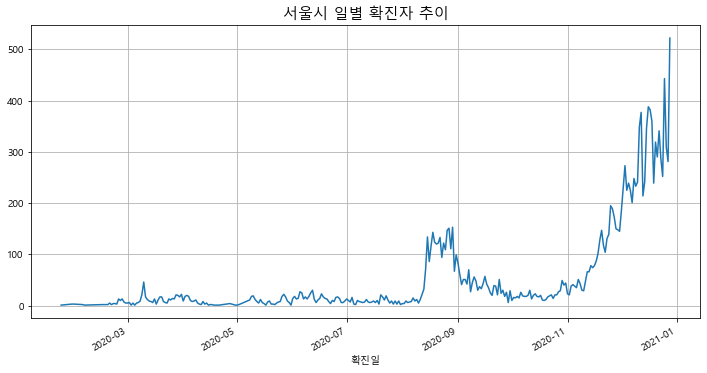

In [74]:
cdf_raw['합계'].plot(grid=True, figsize=(12,6))
plt.title('서울시 일별 확진자 추이', fontsize=15)
plt.show()

In [77]:
cur.close()
conn.close()

ProgrammingError: Cannot operate on a closed database.

### 구별 인구 데이터와 결합하기

In [78]:
pop = pd.read_csv('../static/data/cctv.csv')
pop.set_index('구별', inplace=True)
pop.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483,0.406468,526.315431
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862,0.403444,710.063146
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814,0.274284,1156.473682
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743


In [79]:
pop_corona = pd.DataFrame({'확진자수':cdfT['합계']})
pop_corona['인구수'] = pop['인구수']
pop_corona.head()

,확진자수,인구수
gu,,
강남구,910,544085
강동구,549,462275
강북구,409,313550
강서구,1307,589536
관악구,963,514555


In [80]:
pop_corona['천명당 확진자 수'] = pop_corona['확진자수'] / pop_corona['인구수'] * 1000
pop_corona.head()

,확진자수,인구수,천명당 확진자 수
gu,,,
강남구,910,544085,1.672533
강동구,549,462275,1.187605
강북구,409,313550,1.304417
강서구,1307,589536,2.216998
관악구,963,514555,1.871520


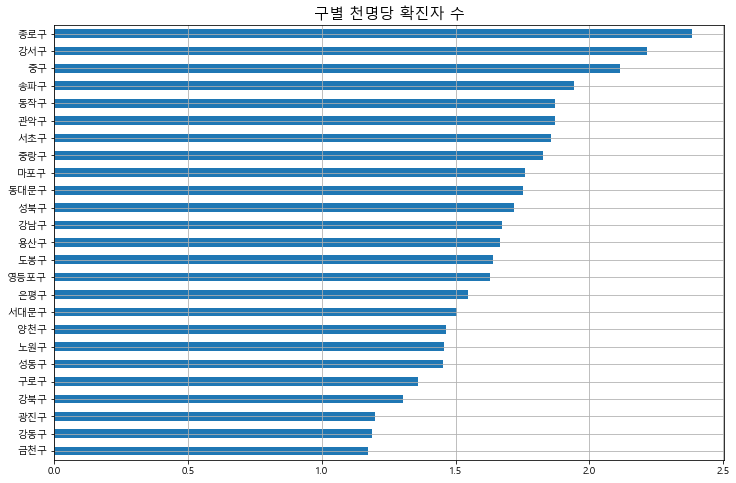

In [81]:
pop_corona['천명당 확진자 수'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 천명당 확진자 수', fontsize=15)
plt.ylabel('')
plt.show()

In [82]:
cdfT['인구수'] = pop['인구수']
cdfT.head()

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,합계,인구수
gu,,,,,,,,,,,,,,
강남구,0,8,36,21,11,7,15,89,82,88,163,390,910,544085
강동구,0,4,6,3,11,11,14,94,42,19,73,272,549,462275
강북구,0,0,5,0,9,10,4,85,31,15,41,209,409,313550
강서구,1,1,20,4,20,33,25,115,64,22,303,699,1307,589536
관악구,0,4,30,9,16,59,27,109,136,86,72,415,963,514555


### 지도 시각화

In [84]:
import folium
import json
geo_data = json.load(open('../static/data/skorea_municipalities_geo_simple.json',
                         encoding='utf8'))

In [85]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
folium.Choropleth(geo_data = geo_data,
               data = pop_corona['확진자수'],
               columns = [pop_corona.index, pop_corona['확진자수']],
               fill_color = 'PuRd',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>누적 확진자수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

In [86]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
folium.Choropleth(geo_data = geo_data,
               data = pop_corona['천명당 확진자 수'],
               columns = [pop_corona.index, pop_corona['천명당 확진자 수']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>천명당 확진자 수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map